# References
**https://towardsdatascience.com/women-in-data-science-wids-datathon-on-kaggle-a3cda3085a7a**

 **https://www.diabetes.org/diabetes**

 **https://www.widsconference.org/datathon-resources.html**

**https://www.widsconference.org/blog_archive/a-beginners-guide-to-the-wids-datathon-2021-challenge**

**Dataset taken from GOSSIS data, which reflects real-world hospital data** 

**https://www.youtube.com/watch?v=cZ-trv7-j7k**

**Different from other projects since we are not predicting the future but predicting the data**



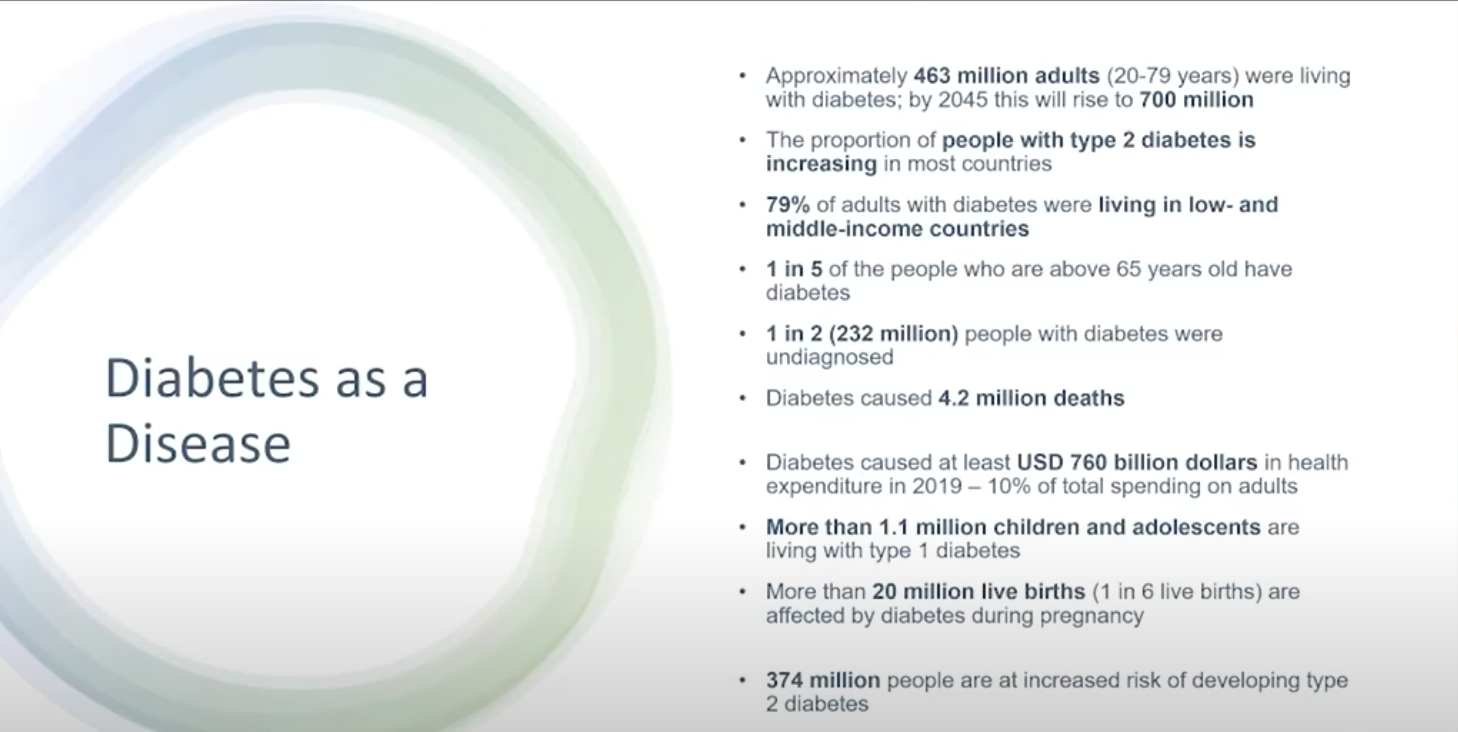

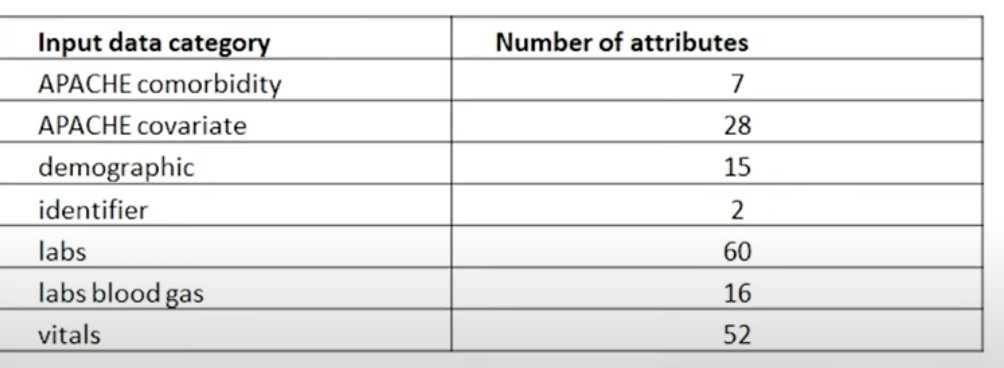

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Data/TrainingWiDS2021.csv')
test = pd.read_csv('../Data/UnlabeledWiDS2021.csv')
dictionary = pd.read_csv('../Data/DataDictionaryWiDS2021.csv')


In [3]:
# Check target
set(df.columns) - set(test.columns)

{'diabetes_mellitus'}

In [4]:
target = 'diabetes_mellitus'

In [5]:
df[target].value_counts()/ df.shape[0]

0    0.783715
1    0.216285
Name: diabetes_mellitus, dtype: float64

In [6]:
df.describe()

Unnamed: 0   encounter_id    hospital_id            age  \
count  130157.000000  130157.000000  130157.000000  125169.000000   
mean    65079.000000  213000.856519     106.102131      61.995103   
std     37573.233831   38109.828146      63.482277      16.822880   
min         1.000000  147000.000000       1.000000       0.000000   
25%     32540.000000  180001.000000      49.000000      52.000000   
50%     65079.000000  213014.000000     112.000000      64.000000   
75%     97618.000000  246002.000000     165.000000      75.000000   
max    130157.000000  279000.000000     204.000000      89.000000   

                 bmi  elective_surgery         height         icu_id  \
count  125667.000000     130157.000000  128080.000000  130157.000000   
mean       29.110260          0.189840     169.607219     662.428344   
std         8.262776          0.392176      10.833085     304.259843   
min        14.844926          0.000000     137.200000      82.000000   
25%        23.598006          0.000000     162.500000     427.000000   
50%        27.564749          0.000000     170.100000     653.000000   
75%        32.803127          0.000000     177.800000     969.000000   
max        67.814990          1.000000     195.590000    1111.000000   

       pre_icu_los_days  readmission_status  ...  h1_pao2fio2ratio_max  \
count     130157.000000            130157.0  ...          16760.000000   
mean           0.839933                 0.0  ...            247.525419   
std            2.485337                 0.0  ...            131.440167   
min           -0.250000                 0.0  ...             42.000000   
25%            0.045833                 0.0  ...            144.000000   
50%            0.155556                 0.0  ...            228.125000   
75%            0.423611                 0.0  ...            333.000000   
max          175.627778                 0.0  ...            720.000000   

       h1_pao2fio2ratio_min          aids      cirrhosis  hepatic_failure  \
count          16760.000000  130157.00000  130157.000000    130157.000000   
mean             239.617358       0.00103       0.016081         0.013599   
std              128.562211       0.03207       0.125786         0.115819   
min               38.000000       0.00000       0.000000         0.000000   
25%              138.000000       0.00000       0.000000         0.000000   
50%              218.750000       0.00000       0.000000         0.000000   
75%              324.000000       0.00000       0.000000         0.000000   
max              654.813793       1.00000       1.000000         1.000000   

       immunosuppression       leukemia       lymphoma  \
count      130157.000000  130157.000000  130157.000000   
mean            0.025669       0.007307       0.004187   
std             0.158146       0.085166       0.064574   
min             0.000000       0.000000       0.000000   
25%             0.000000       0.000000       0.000000   
50%             0.000000       0.000000       0.000000   
75%             0.000000       0.000000       0.000000   
max             1.000000       1.000000       1.000000   

       solid_tumor_with_metastasis  diabetes_mellitus  
count                130157.000000      130157.000000  
mean                      0.020852           0.216285  
std                       0.142888           0.411712  
min                       0.000000           0.000000  
25%                       0.000000           0.000000  
50%                       0.000000           0.000000  
75%                       0.000000           0.000000  
max                       1.000000           1.000000  

[8 rows x 175 columns]

In [7]:
# Remove unwanted features 

df=df.copy().drop(['Unnamed: 0','encounter_id', 'hospital_id', 'icu_id', 'urineoutput_apache'], axis=1)

In [8]:
# Percentage of nan values before imputation
print(f'Percent of Nans in Train Data : {round(df.isna().sum().sum()/len(df), 2)}')
print(f'Percent of Nans in Test  Data : {round(test.isna().sum().sum()/len(test), 2)}')

Percent of Nans in Train Data : 61.12
Percent of Nans in Test  Data : 61.7


In [9]:
wids = df.iloc[:, 45:90]
print(type(wids))
wids_test = test.iloc[:, 45:90]

<class 'pandas.core.frame.DataFrame'>


In [10]:
# First hour and first 24 hour lab test data.. it comes in vital category
# The usefulness of the model goes les and less in time so first hour test data is more dominating 
# Ref: https://www.youtube.com/watch?v=cZ-trv7-j7k (from: 35.00-35.50 )

wids

d1_diasbp_noninvasive_min  d1_heartrate_max  d1_heartrate_min  \
0                            37.0             119.0              72.0   
1                            31.0             118.0              72.0   
2                            48.0              96.0              68.0   
3                            42.0             116.0              92.0   
4                            57.0              89.0              60.0   
...                           ...               ...               ...   
130152                       82.0             101.0              89.0   
130153                       63.0             101.0              78.0   
130154                       60.0             101.0              58.0   
130155                       44.0             110.0              70.0   
130156                       75.0              97.0              71.0   

        d1_mbp_invasive_max  d1_mbp_invasive_min  d1_mbp_max  d1_mbp_min  \
0                      66.0                 40.0        89.0        46.0   
1                       NaN                  NaN       120.0        38.0   
2                       NaN                  NaN       102.0        68.0   
3                      92.0                 52.0        84.0        84.0   
4                       NaN                  NaN       104.0        90.0   
...                     ...                  ...         ...         ...   
130152                  NaN                  NaN       120.0       104.0   
130153                  NaN                  NaN       125.0        79.0   
130154                110.0                 59.0       110.0        83.0   
130155                  NaN                  NaN        97.0        54.0   
130156                  NaN                  NaN       106.0        91.0   

        d1_mbp_noninvasive_max  d1_mbp_noninvasive_min  d1_resprate_max  ...  \
0                         89.0                    46.0             34.0  ...   
1                        120.0                    38.0             32.0  ...   
2                        102.0                    68.0             21.0  ...   
3                         84.0                    84.0             23.0  ...   
4                        104.0                    90.0             18.0  ...   
...                        ...                     ...              ...  ...   
130152                   120.0                   104.0             40.0  ...   
130153                   125.0                    79.0             37.0  ...   
130154                   110.0                    83.0             34.0  ...   
130155                    97.0                    54.0             31.0  ...   
130156                   106.0                    91.0             35.0  ...   

        h1_resprate_max  h1_resprate_min  h1_spo2_max  h1_spo2_min  \
0                  26.0             18.0        100.0         74.0   
1                  31.0             28.0         95.0         70.0   
2                  20.0             16.0         98.0         91.0   
3                  12.0             11.0        100.0         99.0   
4                   NaN              NaN        100.0        100.0   
...                 ...              ...          ...          ...   
130152             40.0             22.0         97.0         88.0   
130153             28.0             25.0         97.0         92.0   
130154             24.0             24.0        100.0        100.0   
130155             28.0              8.0         98.0         97.0   
130156             35.0             25.0        100.0         99.0   

        h1_sysbp_invasive_max  h1_sysbp_invasive_min  h1_sysbp_max  \
0                         NaN                    NaN         131.0   
1                         NaN                    NaN          95.0   
2                         NaN                    NaN         148.0   
3                       136.0                  106.0         136.0   
4                         NaN                    NaN         130.0

In [11]:
# col_info=pd.DataFrame()
# col_info['unique_val'] = wids.nunique
# col_info['type'] = wids.dtypes
# col_info

In [12]:
pd.DataFrame({"is_null_count": wids.isna().sum()*100/len(df)})

is_null_count
d1_diasbp_noninvasive_min       1.256944
d1_heartrate_max                0.201295
d1_heartrate_min                0.201295
d1_mbp_invasive_max            72.887359
d1_mbp_invasive_min            72.887359
d1_mbp_max                      0.251235
d1_mbp_min                      0.251235
d1_mbp_noninvasive_max          1.711779
d1_mbp_noninvasive_min          1.711779
d1_resprate_max                 0.524751
d1_resprate_min                 0.524751
d1_spo2_max                     0.408737
d1_spo2_min                     0.408737
d1_sysbp_invasive_max          73.017971
d1_sysbp_invasive_min          73.017971
d1_sysbp_max                    0.208210
d1_sysbp_min                    0.208210
d1_sysbp_noninvasive_max        1.246956
d1_sysbp_noninvasive_min        1.246956
d1_temp_max                     3.452753
d1_temp_min                     3.452753
h1_diasbp_invasive_max         80.540424
h1_diasbp_invasive_min         80.540424
h1_diasbp_max                   4.246410
h1_diasbp_min                   4.246410
h1_diasbp_noninvasive_max       8.711787
h1_diasbp_noninvasive_min       8.711787
h1_heartrate_max                3.130066
h1_heartrate_min                3.130066
h1_mbp_invasive_max            80.492021
h1_mbp_invasive_min            80.492021
h1_mbp_max                      5.017018
h1_mbp_min                      5.017018
h1_mbp_noninvasive_max         10.216124
h1_mbp_noninvasive_min         10.216124
h1_resprate_max                 4.958627
h1_resprate_min                 4.958627
h1_spo2_max                     4.795747
h1_spo2_min                     4.795747
h1_sysbp_invasive_max          80.523522
h1_sysbp_invasive_min          80.523522
h1_sysbp_max                    4.240264
h1_sysbp_min                    4.240264
h1_sysbp_noninvasive_max        8.704872
h1_sysbp_noninvasive_min        8.704872

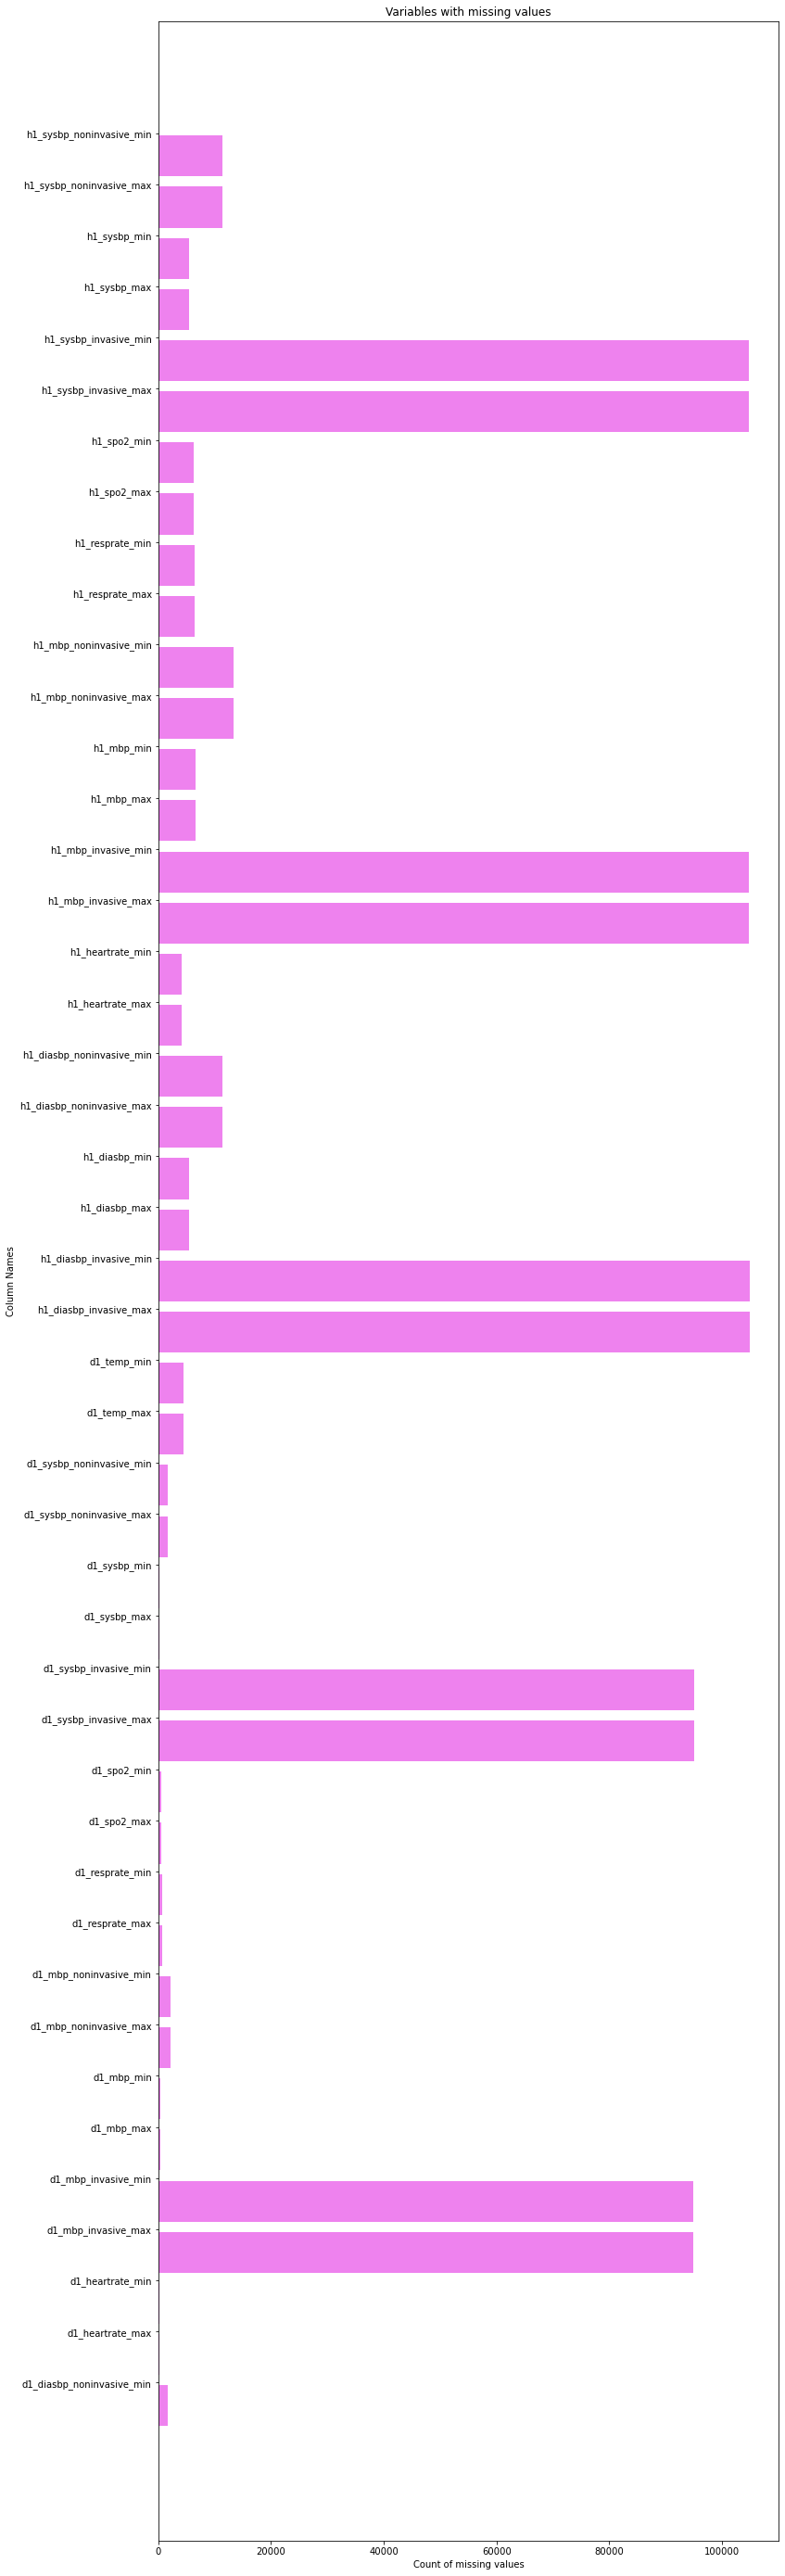

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
#import pycomp
#from pycomp.viz.insights import *


null_col = wids.columns[wids.isnull().any()]
wids[null_col].isnull().sum()

labels = []
val=[]
for col in null_col:
    labels.append(col)
    val.append(wids[col].isnull().sum())

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,50))
rects = ax.barh(ind, np.array(val), color='violet')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");
    

In [14]:
# Useful new features other than target 
def new_features(df):
    #df["d1_glucose_max_min_diff"] = df["d1_glucose_max"] - df["d1_glucose_min"]
    df["d1_heartrate_max_min_diff"] = df["d1_heartrate_max"] - df["d1_heartrate_min"]
    #df["d1_glucose_max_h1_diff"] = df["d1_glucose_max"] - df["h1_glucose_max"]

    return df


In [15]:
d1_min = []
d1_max = []
h1_min = []
h1_max = []
cols = []
for col in df.columns[df.columns.str.startswith('d1') & df.columns.str.endswith('min')]:
    d1_min.append(col)
#print(d1_min)
    col_new = col.replace("d1_", "").replace("_min", "")
    #print(col_new)
    cols.append(col_new)
for col in df.columns[df.columns.str.startswith('d1') & df.columns.str.endswith('max')]:
    d1_max.append(col)
#print(d1_max)
for col in df.columns[df.columns.str.startswith('h1') & df.columns.str.endswith('min')]:
    h1_min.append(col)
#print(h1_min)
for col in df.columns[df.columns.str.startswith('h1') & df.columns.str.endswith('max')]:
    h1_max.append(col)
#print(h1_max)

In [16]:
hour_day_df = pd.DataFrame({"name": cols, 
                            "24-hour min": df[d1_min].isna().sum(axis = 0).values,
                            "24-hour max": df[d1_max].isna().sum(axis = 0).values,
                            "1-hour min": df[h1_min].isna().sum(axis = 0).values,
                            "1-hour max": df[h1_max].isna().sum(axis = 0).values}).set_index("name")

hour_day_df_test = pd.DataFrame({"name": cols, 
                                 "24-hour min": test[d1_min].isna().sum(axis = 0).values, 
                                 "24-hour max": test[d1_max].isna().sum(axis = 0).values, 
                                 "1-hour min": test[h1_min].isna().sum(axis = 0).values, 
                                 "1-hour max": test[h1_max].isna().sum(axis = 0).values}).set_index("name")
hour_day_df

24-hour min  24-hour max  1-hour min  1-hour max
name                                                                
diasbp_invasive           95068        95068      104829      104829
diasbp                      277          277        5527        5527
diasbp_noninvasive         1636         1636       11339       11339
heartrate                   262          262        4074        4074
mbp_invasive              94868        94868      104766      104766
mbp                         327          327        6530        6530
mbp_noninvasive            2228         2228       13297       13297
resprate                    683          683        6454        6454
spo2                        532          532        6242        6242
sysbp_invasive            95038        95038      104807      104807
sysbp                       271          271        5519        5519
sysbp_noninvasive          1623         1623       11330       11330
temp                       4494         4494       29703       29703
albumin                   71406        71406      119005      119005
bilirubin                 76735        76735      119861      119861
bun                       13734        13734      104990      104990
calcium                   16692        16692      105921      105921
creatinine                13273        13273      104784      104784
glucose                    8243         8243       75073       75073
hco3                      20047        20047      106395      106395
hemaglobin                16232        16232      102790      102790
hematocrit                15588        15588      102956      102956
inr                       81213        81213       81213       81213
lactate                   95503        95503      118467      118467
platelets                 18557        18557      105729      105729
potassium                 12546        12546      100821      100821
sodium                    13270        13270      101781      101781
wbc                       17429        17429      105986      105986
arterial_pco2             84461        84461      107666      107666
arterial_ph               84807        84807      107849      107849
arterial_po2              84010        84010      107445      107445
pao2fio2ratio             93339        93339      113397      113397

In [17]:
# visualize for readable
# https://www.kaggle.com/paramarthasengupta/wids-datathon-21-octoml-lgbm-0-86372

import matplotlib.pyplot as plt
import plotly as pl
import plotly.express as px 
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import random
import warnings
import missingno as msno
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
# from lightgbm import LGBMClassifier
# import lightgbm as lgb

# visualize for readable
def visualize_miss_val_day_hour(df):
    index = df.index.tolist()
    fig = go.Figure(data=[
        go.Bar(name='h1', x=index, y=df['1-hour min'] + df['1-hour max']),
        go.Bar(name='d1', x=index, y=df['24-hour min'] + df['24-hour max'])
    ])
    fig.update_layout()
    fig.show()

visualize_miss_val_day_hour(hour_day_df)
visualize_miss_val_day_hour(hour_day_df_test)

# Observation:

# As we can see from the plot, almost h1 features and features contain invasive have a high level of missing values.


In [18]:
# Check correlation between vital data category features 
corrl = wids.corr()
corrl.style.background_gradient(cmap='copper').set_precision(2)

# Regression imputation
Mean, median or mode imputation only look at the distribution of the values of the variable with missing entries. If we know there is a correlation between the missing value and other variables, we can often get better guesses by regressing the missing variable on other variables.

https://medium.com/@Cambridge_Spark/tutorial-introduction-to-missing-data-imputation-4912b51c34eb#:~:text=Regression%20imputation&text=Thus%2C%20we%20can%20use%20a,the%20missing%20values%20in%20total_bill.&text=Another%20way%20to%20improve%20regression,predicted%20value%20from%20the%20regression.



In [19]:
# Apply linear regression model on numerical data to impute values

#!pip install tqdm
from sklearn.linear_model import LinearRegression, LassoCV
from tqdm import tqdm
import pickle
from scipy import stats, special
import pandas as pd
import numpy as np
import os
import warnings

def fillna_using_linear_model(df):
    
    fea_cols=[]
    for col in df.columns:
        if df[col].dtype=='float64':
            fea_cols.append(col)

    correl = df[fea_cols].corr()

    for col in tqdm(fea_cols):
        nan_ratio = df[col].isnull().sum() / df.shape[0]
        if nan_ratio > 0:
            best_nan_ratio = nan_ratio
            best_col = None
            for id in correl.loc[(correl[col] > 0.7) | (correl[col] < -0.7), col].index:
                nan_temp_ratio = df[id].isnull().sum() / df.shape[0]
                if best_nan_ratio > nan_temp_ratio:
                    best_nan_ratio = nan_temp_ratio
                    best_col = id
            if best_col != None:
                sub = df[[col, best_col]].copy()
                sub = sub.dropna()
                reg = LinearRegression(fit_intercept=True).fit(np.expand_dims(sub[best_col], axis=1), sub[col])
                print(reg.score(np.expand_dims(sub[best_col], axis=1), sub[col]))
                if reg.score(np.expand_dims(sub[best_col], axis=1), sub[col])>0.7:
                    if df.loc[(~df[best_col].isnull()) & (df[col].isnull()), col].shape[0] > 0:
                        df.loc[(~df[best_col].isnull()) & (df[col].isnull()), col] = \
                        reg.predict(np.expand_dims(df.loc[(~df[best_col].isnull()) & (df[col].isnull()), best_col], axis=1))

    return df

df_imp=fillna_using_linear_model(df.copy())

 12%|█▏        | 18/156 [00:00<00:03, 39.76it/s]

0.772036719457342
0.9265505551177473
0.9935035155021272
0.9732885698813026
0.9868479047265101
0.8525241276635663
0.6548259451318532
0.8245383182733199
0.6572628054254155
0.6572628054254155
0.5224056667999112
0.790141353576532
0.6271656424922127


 26%|██▌       | 40/156 [00:00<00:01, 70.48it/s]

0.9377996037652799
0.563520769020351
0.9933743343176455
0.9932092949406127
0.5556868832041206
0.6232299891476355
0.5630410484129751
0.6303842387953886
0.5152979908671131
0.9928207761805053
0.9913514557124004


 45%|████▍     | 70/156 [00:01<00:00, 98.54it/s]

0.5060654310356865
0.9694702204192752
0.9658512634599362
0.6155171814780587
0.49954907647888736
0.613479087833916
0.6662966101016454
0.6211163242983375
0.669906419171268
0.5102991932617936
0.551171550784554
0.5027837747649799
0.5333034128989098
0.5416523559011788


 60%|██████    | 94/156 [00:01<00:00, 98.79it/s] 

0.9361060575171923
0.8725254720878151
0.9941054575027845
0.9767732858826569
0.975408514119911
0.9363232872279547
0.9879315806368937
0.941021974766769
0.8566723760765635
0.7783857412401008
0.794461849326728


 69%|██████▊   | 107/156 [00:01<00:00, 103.00it/s]

0.916805019752209
0.750975270413783
0.8039046210454779
0.8405292568229286
0.9438276118860944
0.8616031478807279
0.7711183908933796
0.7710017086327847
0.9692895023630832
0.9692515353725795
0.9484210074079492


 82%|████████▏ | 128/156 [00:01<00:00, 78.43it/s] 

0.9486854761624861
0.7432556870608313
0.7343144957096652
0.9591140637455936
0.9595413530720556
0.6947091190865238
0.6772519671702303
0.598936171744958
0.5938862373769508
0.8422776439192754
0.802557186504078
0.7927793235779157
0.7563891524145874


 88%|████████▊ | 137/156 [00:01<00:00, 77.17it/s]

0.8602707413837372
0.8542156738363446
0.9609365290615232
0.9554339174650754
0.5818389673876133
0.5441567907817451
0.7412473194228378
0.7405928794508561
0.7995630622495713
0.7968367568066586
0.8362606496300309


100%|██████████| 156/156 [00:02<00:00, 77.07it/s]

0.7610359295829887
0.7091463640874043
0.8012832709031186
0.7725154724816914
0.5897366740701435
0.6603529145080085
0.5946495105047238


In [20]:
# Percentage of nan values before imputation
print(f'Percent of Nans in Train Data : {round(df_imp.isna().sum().sum()/len(df), 2)}')


Percent of Nans in Train Data : 46.46


**Using linear regression about 15% missing data are imputed.In order to impute rest missing data use we can use simple imputer with mean**